<a href="https://colab.research.google.com/github/Parul30163/python/blob/main/internshala7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df= pd.read_csv('/content/Transformed_Housing_Data2.csv')

In [3]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df['mean_sales']=df['Sale_Price'].mean()
df['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

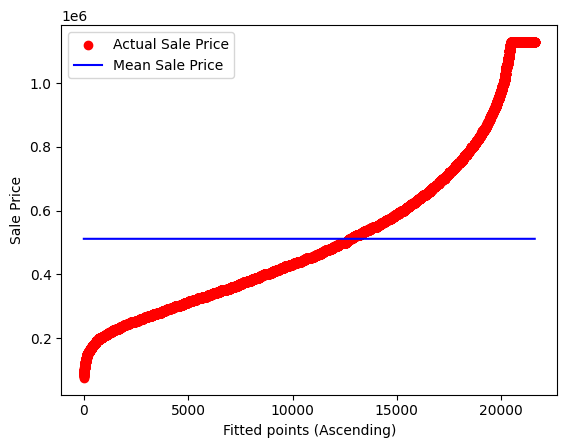

In [5]:
import matplotlib.pyplot as plt
plt.figure(dpi =100)
k =range(0,len(df))
plt.scatter(k ,df['Sale_Price'].sort_values(),color ='red',label ='Actual Sale Price')
plt.plot(k,df['mean_sales'].sort_values(),color ='blue',label ='Mean Sale Price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

In [8]:
import numpy as np


In [10]:
grades_mean =df.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [12]:
#making new column
df['grade_mean']=0

#for every grade fill its mean price in new column
for i in grades_mean.columns:
  df['grade_mean'][df['Overall Grade']==i]=grades_mean[i][0]

df['grade_mean'].head()

<ipython-input-12-8e85943a2bc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_mean'][df['Overall Grade']==i]=grades_mean[i][0]
<ipython-input-12-8e85943a2bc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_mean'][df['Overall Grade']==i]=grades_mean[i][0]
<ipython-input-12-8e85943a2bc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_mean'][df['Overall Grade']==i]=grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [13]:
gradewise_list =[]
for i in range(1,11):
  k =df[df['Overall Grade']==i]
  gradewise_list.append(k)

In [14]:
classwise_list =[]
for i in range(1,11):
  k =df[df['Overall Grade']==i]
  classwise_list.append(k)

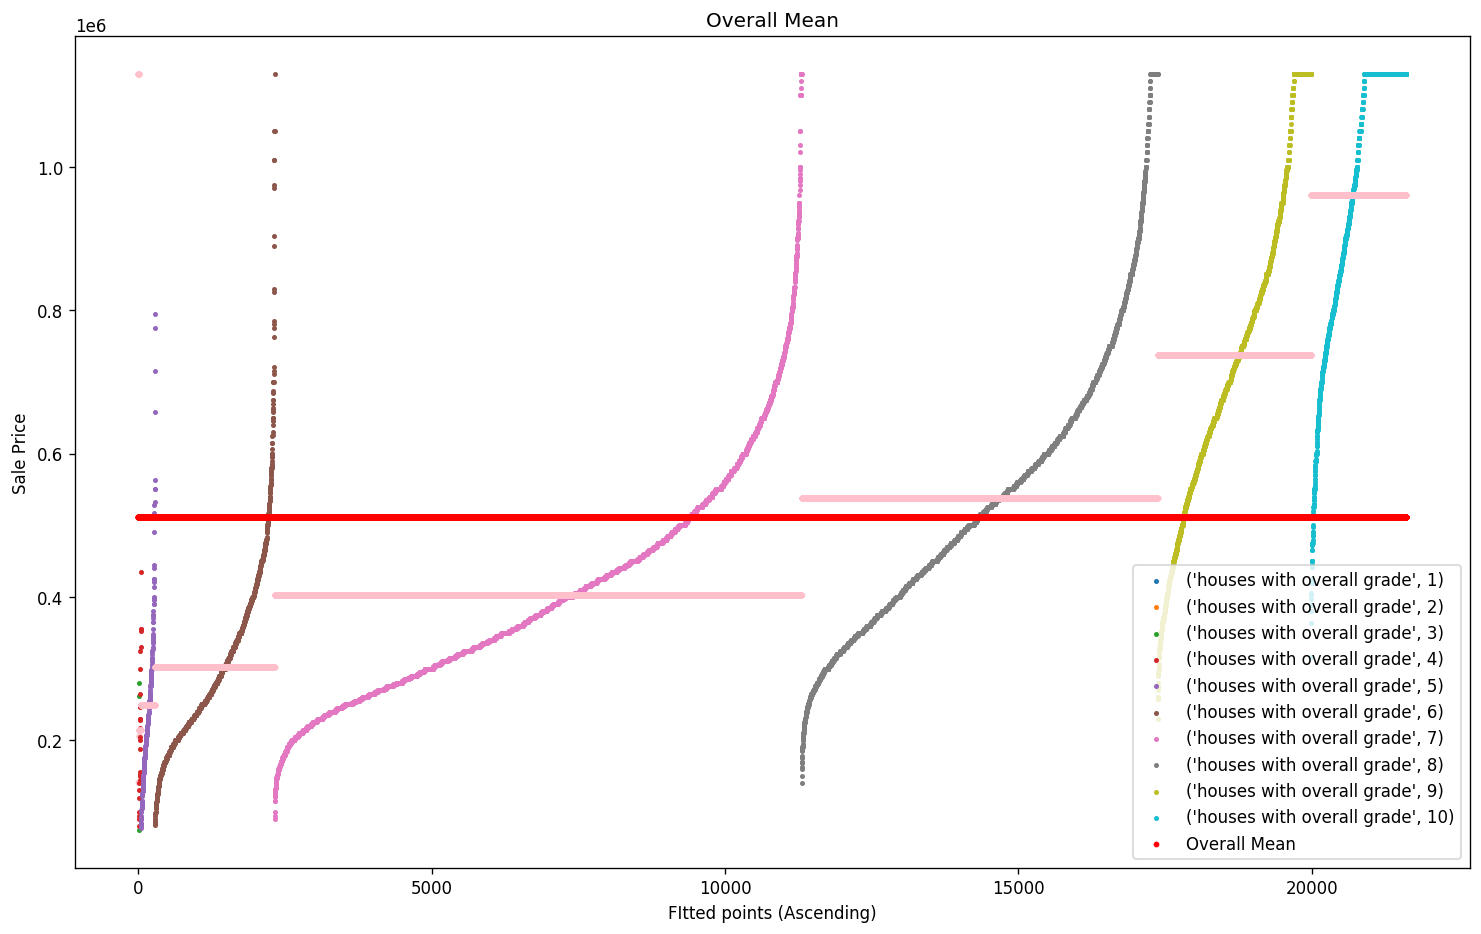

In [18]:
plt.figure(dpi =120 ,figsize=(15,9))

####plotting "Sale_Price" gradewise####
#z variable is for x-axis

z=0
for i in range(1,11):
  #deffining x-axis using z
  points =[k for k in range ( z,z+ len(classwise_list[i-1]))]
  #Plotting
  plt.scatter (points ,
               classwise_list[i-1].sort_values(by='Sale_Price')['Sale_Price'],
               label =('houses with overall grade', i),s=4)
  #Plotting gradewise mean
  plt.scatter(points ,
              [classwise_list[i-1]['Sale_Price'].mean() for q in range(len(classwise_list[i-1]))],
              s=6 ,color ='pink')
  z= max(points)+1

##plotting overall mean ##
plt.scatter([q for q in range(0,z)],
            df['mean_sales'],
            color ='red',
            label ='Overall Mean',
            s=6)
plt.xlabel('FItted points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc =4)

In [19]:
mean_difference =df['mean_sales']-df['Sale_Price']
grade_mean_difference =df['grade_mean']-df['Sale_Price']

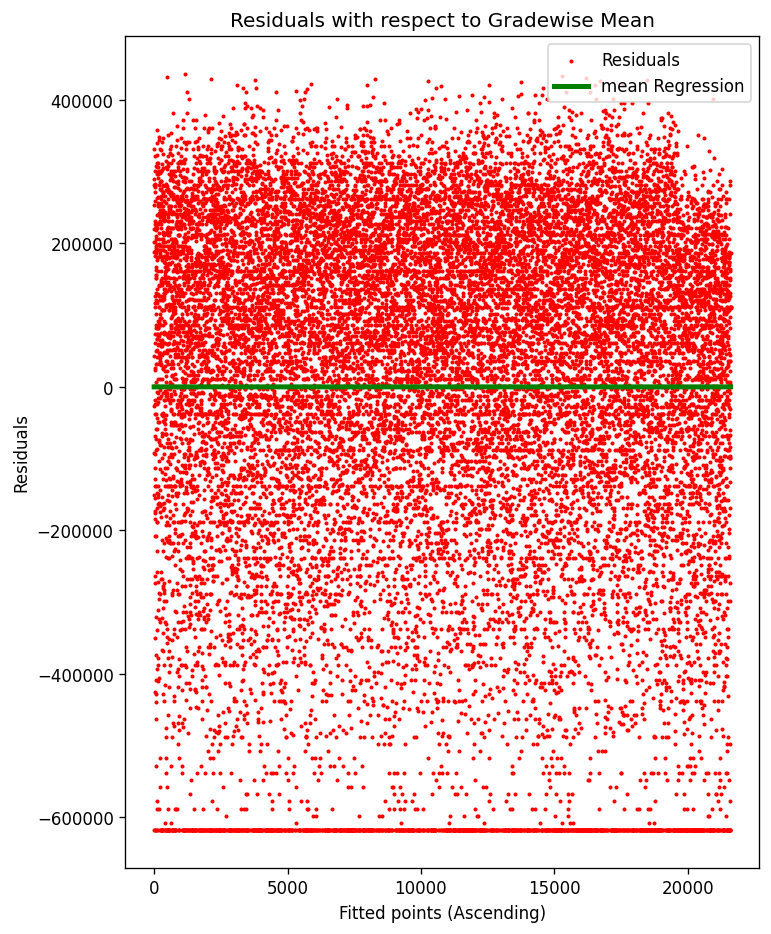

In [24]:
k=range(0,len(df))
l = [0 for i in range (len(df))]

plt.figure(figsize=(15,9),dpi=120)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color ='red', label ="Residuals",s=2)
plt.plot(k,l,color ='green', label ='mean Regression',linewidth=3)
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals with respect to Gradewise Mean')

plt.legend()

In [25]:
cost =sum(mean_difference)/len(df)
print(round(cost,7))

0.0


In [26]:
y =df['Sale_Price']
y_hat1 =df['mean_sales']
y_hat2 =df['grade_mean']
n =len(df)

len(y),len(y_hat1),len(y_hat2),n

(21609, 21609, 21609, 21609)

In [27]:
cost_mean =sum(abs(y_hat1 -y))/n
cost_mean

199168.78146839526

In [28]:
cost_mean =sum(abs(y_hat2 -y))/n
cost_mean

137081.70298203363

In [29]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean =mean_absolute_error(y_hat2,y)
cost_grade_mean

137081.7029820291

In [30]:
from sklearn.metrics import mean_squared_error
cost_mean =mean_squared_error(y_hat1,y)
cost_grade_mean =mean_squared_error(y_hat2,y)
cost_grade_mean,cost_mean

(30804835720.342426, 62528116847.799576)

In [32]:
from sklearn.metrics import mean_squared_error
cost_mean =mean_squared_error(y_hat1,y)**0.5
cost_grade_mean =mean_squared_error(y_hat2,y)**0.5
cost_grade_mean,cost_mean

(175513.06424406826, 250056.2273725643)

In [33]:
y=df['Sale_Price']
y_bar =df['mean_sales']
y_hat =df['grade_mean']
n =len(df)

len(y) ,len(y_bar) ,len(y_hat),n

(21609, 21609, 21609, 21609)

In [34]:
mse_mean =mean_squared_error(y_hat ,y)
mse_mean

30804835720.342426

In [35]:
mse_model =mean_squared_error(y_bar ,y)
mse_model

62528116847.799576

In [39]:
R2 =1-(mse_mean/mse_model)
R2

0.5073442592981836

In [41]:
sale_price =df['Sale_Price'].head(30)
flat_area =df['Flat Area (in Sqft)'].head(30)
sample_data =pd.DataFrame({'Sale_Price':sale_price,'Flat_Area':flat_area})
sample_data

,Sale_Price,Flat_Area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


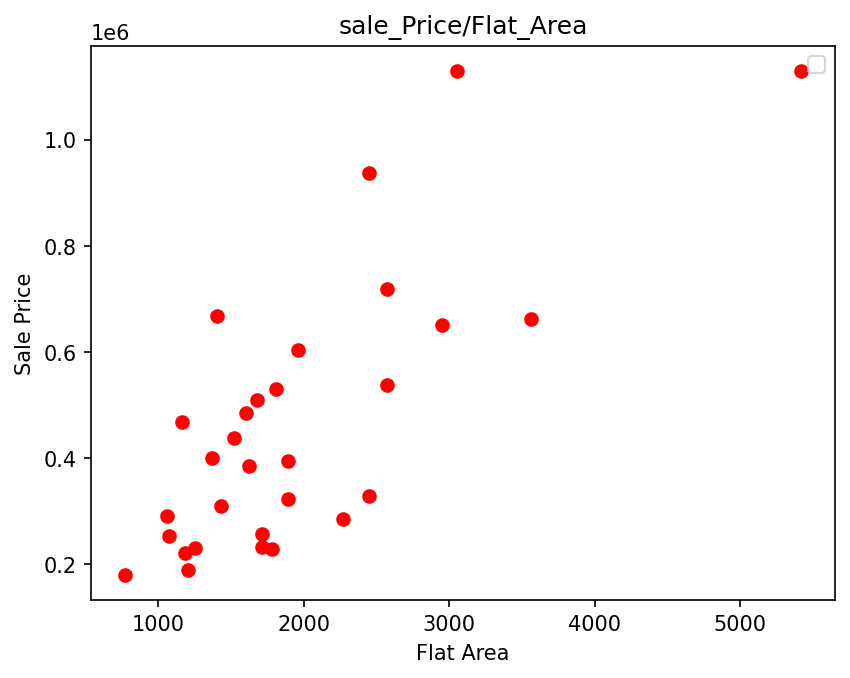

In [42]:
plt.figure (dpi=150)
plt.scatter(sample_data['Flat_Area'],sample_data['Sale_Price'],color ='red')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title("sale_Price/Flat_Area")
plt.legend()
plt.show()

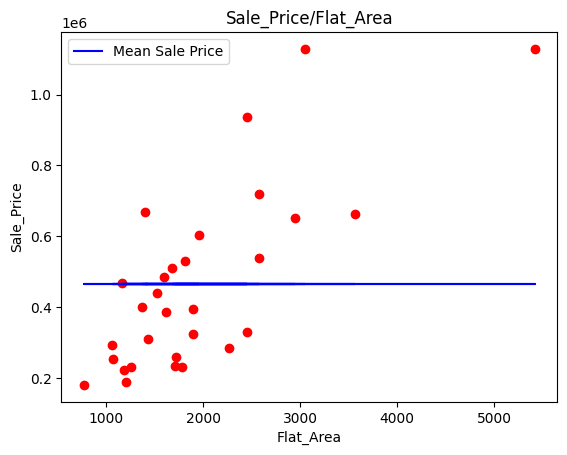

In [50]:
sample_data['mean_Sale_price'] = sample_data.Sale_Price.mean()
plt.scatter(sample_data['Flat_Area'],sample_data.Sale_Price,color ='red')
plt.plot(sample_data['Flat_Area'],sample_data['mean_Sale_price'],color ='blue',label ="Mean Sale Price") # Access column using brackets
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

In [51]:
c=0
m=0
line =[]

for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi =130)
plt.scatter(sample_data['Flat_Area'],sample_data.Sale_Price,color ='red')
plt.plot(sample_data.flat_area,sample_data.sale_price)
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE= mse(sample_data.sale_price,line)

plt.title("Slope"+str(m)+"with MSE"+str(MSE))

AttributeError: 'DataFrame' object has no attribute 'flat_area'

Text(0.5, 1.0, 'Slope0with MSE281372081125.0')

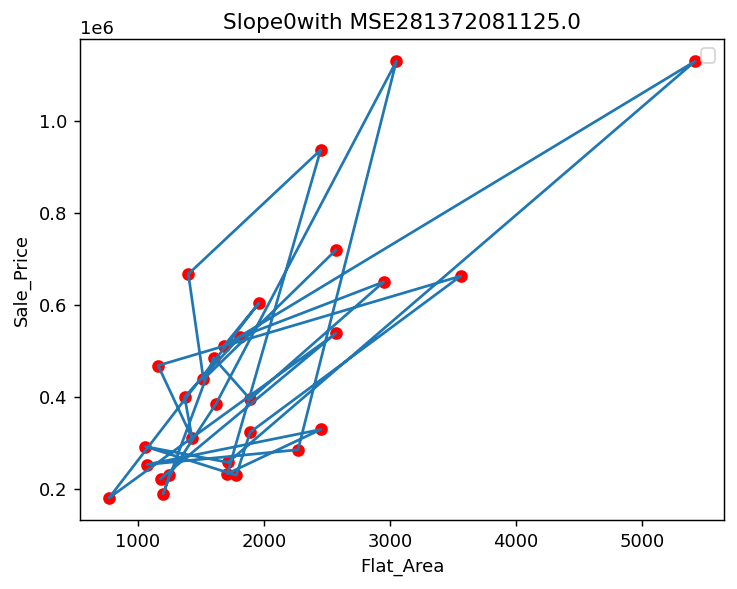

In [53]:
!pip install scikit-learn # Install scikit-learn which contains the mean_squared_error function

from sklearn.metrics import mean_squared_error # Import the mean_squared_error function

c=0
m=0
line =[]

for i in range(len(sample_data)):
  line.append(sample_data.Flat_Area[i]*m+c) # Use 'Flat_Area' instead of 'flat_area'

plt.figure(dpi =130)
plt.scatter(sample_data['Flat_Area'],sample_data.Sale_Price,color ='red')
plt.plot(sample_data.Flat_Area,sample_data.Sale_Price) # Use 'Flat_Area' instead of 'flat_area'
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()

MSE= mean_squared_error(sample_data.Sale_Price,line) # Use mean_squared_error function from scikit-learn

plt.title("Slope"+str(m)+"with MSE"+str(MSE))

Text(0.5, 1.0, 'Slope50with MSE184728400708.33334')

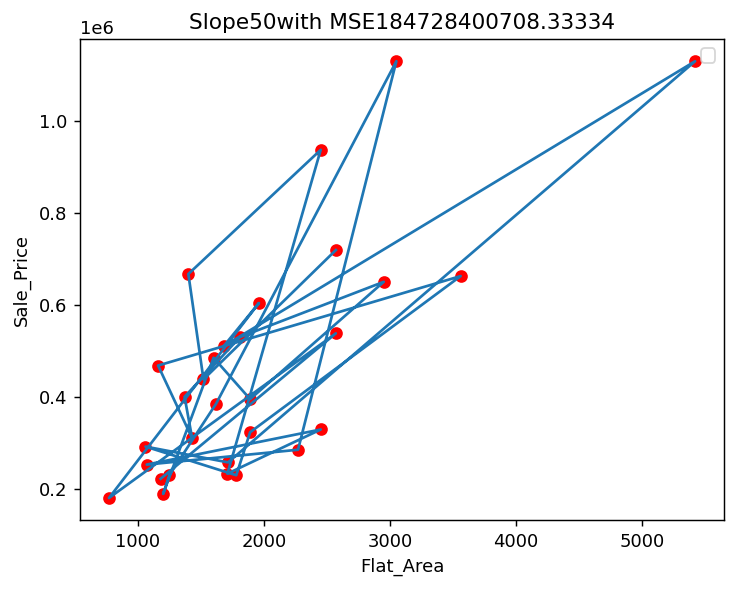

In [54]:
from sklearn.metrics import mean_squared_error # Import the mean_squared_error function

c=0
m=50
line =[]

for i in range(len(sample_data)):
  line.append(sample_data.Flat_Area[i]*m+c) # Use 'Flat_Area' instead of 'flat_area'

plt.figure(dpi =130)
plt.scatter(sample_data['Flat_Area'],sample_data.Sale_Price,color ='red')
plt.plot(sample_data.Flat_Area,sample_data.Sale_Price) # Use 'Flat_Area' instead of 'flat_area'
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()

MSE= mean_squared_error(sample_data.Sale_Price,line) # Use mean_squared_error function from scikit-learn

plt.title("Slope"+str(m)+"with MSE"+str(MSE))

In [60]:
def slope_Error(slope ,intercept ,sample_data):
  sale=[] # Initialize 'sale' outside the loop
  for i in range(len(sample_data.Flat_Area)): # Changed 'flat_area' to 'Flat_Area'
    tmp =sample_data.Flat_Area[i]*slope+intercept # Changed 'flat_area' to 'Flat_Area'
    sale.append(tmp)
  MSE= mean_squared_error(sample_data.Sale_Price,sale) # Use mean_squared_error function from scikit-learn, calculate MSE after the loop
  return MSE # Indentation corrected to return MSE outside the loop

In [61]:
slope =[i/10 for i in range(0,5000)]
Cost =[]
for i in slope:
  cost =slope_Error(slope=i,intercept=0, sample_data=sample_data)
  Cost.append(cost)

In [62]:
#Arranging in Dataframe
Cost_table =pd.DataFrame({'Slope':slope,'Cost':Cost})
Cost_table.tail()

,Slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


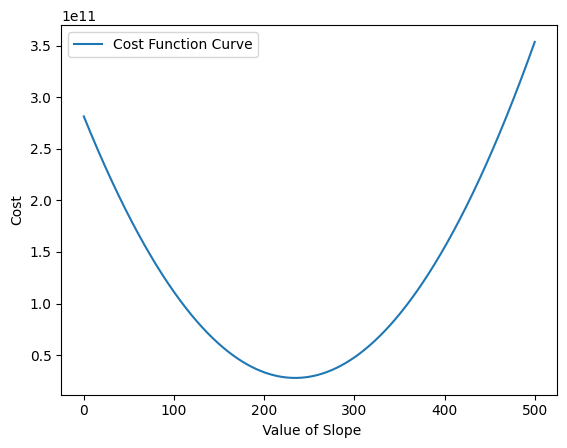

In [65]:
#ploting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Slope,Cost_table.Cost,label ='Cost Function Curve') # Changed 'slope' to 'Slope'
plt.xlabel(' Value of Slope')
plt.ylabel('Cost')
plt.legend()

In [69]:
new_slope = Cost_table['Slope'][Cost_table['Cost'] == min(Cost_table['Cost'])] # Changed 'slope' to 'Slope'
# Access the first element using .iloc[0] to get the value by position
new_slope.iloc[0]

234.3

In [70]:
def intercept_Error (slope ,intercept ,sample_data):
  sale =[]
  for i in range(len(sample_data.Flat_Area)):
    tmp =sample_data.Flat_Area[i]*slope+intercept
    sale.append(tmp)
    MSE= mean_squared_error(sample_data.Sale_Price,sale)
    return MSE

In [90]:
intercept =[i for i in range(5000,5000)]
Cost =[]
for i in intercept:
  cost =intercept_Error(slope=0,intercept=i,sample_data=sample_data)
  Cost.append(cost)

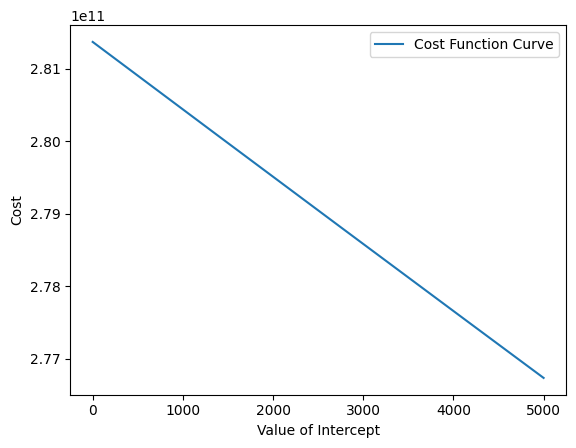

In [91]:
# Add the intercept list as a column to the Cost_table DataFrame
#Cost_table['intercept'] = intercept

#plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept,Cost_table.Cost,label ='Cost Function Curve')
plt.xlabel('Value of Intercept')
plt.ylabel('Cost')
plt.legend()

In [92]:
new_slope = Cost_table['slope'][Cost_table['Cost'] ==Cost_table['Cost'].min()].values
new_slope[0]

499.9

IMPLEMENTING GRAIDENT DECENT

In [93]:
def param_init(y):
  m=0.1
  c= y.mean()
  return m,c

In [100]:
def generate_prediction(x,m,c):
  prediction =[]
  for x in X:
    pred =(m*x)+c
    prediction.append(pred)
  return prediction

In [101]:
def compute_cost(predication , y):
  """

  Args:
    predication:
    y:

  Returns:

  """
  cost =np.sum(((prediction-y)**2)/len(y))
  return cost

In [102]:
def gradients(prediction ,y, x):
  """

  Args:
    prediction:
    y:
    x:

  Returns:

  """
  n =len(y)
  gm =2/n*np.sum(x*(prediction-y))
  gc =2/n*np.sum(prediction-y)
  return gm,gc

In [103]:
def param_update(m_old,c_old,gm_old,gc_old,alpha):
  m_new=m_old-alpha*gm_old
  c_new=c_old-alpha*gc_old
  return m_new,c_new

In [106]:
import matplotlib.pyplot as plt

def result(m,c,x,y,cost,prediction,i):
  if i < max_iter-1:
    print("Gradient decent".format(i))
  else:
    print("result",max_iter,'iteration')

  plt.figure(figsize =(14,7),dpi =120)
  plt.scatter(x,y,color ='red',label='data points') # Use x and y as arguments to plt.scatter
  label ='final regression line: m= {}; c={}'.format(str(m),str(c))
  plt.plot(x,prediction,color ='green',label =label) # Use prediction as argument to plt.plot
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

In [111]:

'''
sale_price =sample_data['sale_price'].values.reshape(-1,1)
flat_area =sample_data['flat_area'].values.reshape(-1,1)

max_iter =1000
cost_old =0
alpha =0.01

m,c =param_init(sale_price)
for i in range(max_iter):
  prediction =generate_prediction(flat_area,m,c)
  cost_new =compute_cost(prediction,sale_price)

  if abs(cost_new-cost_old)<0.0001:
    break

  gm,gc =gradients(prediction,sale_price,flat_area)

  m,c =param_update(m,c,gm,gc,alpha)

  if i%20 ==0:
    print('after iteration', i,':m=' ,m,'c=',c,'; Cost =',cost_new)
    result(m,c,flat_area,sale_price,cost_new,prediction,i)
    plt.show()
  '''

"\nsale_price =sample_data['sale_price'].values.reshape(-1,1)\nflat_area =sample_data['flat_area'].values.reshape(-1,1)\n\nmax_iter =1000\ncost_old =0\nalpha =0.01\n\nm,c =param_init(sale_price)\nfor i in range(max_iter):\n  prediction =generate_prediction(flat_area,m,c)\n  cost_new =compute_cost(prediction,sale_price)\n\n  if abs(cost_new-cost_old)<0.0001:\n    break\n  \n  gm,gc =gradients(prediction,sale_price,flat_area)\n\n  m,c =param_update(m,c,gm,gc,alpha)\n\n  if i%20 ==0:\n    print('after iteration', i,':m=' ,m,'c=',c,'; Cost =',cost_new)\n    result(m,c,flat_area,sale_price,cost_new,prediction,i)\n    plt.show()\n  "

In [109]:
def generate_prediction(x, m, c):
  prediction =[]
  for x_val in x:  # Iterate over elements of x
      pred =(m*x_val)+c
      prediction.append(pred)
  return prediction # Return the list of predictions

In [112]:
###################################################33